# Data Mining and Machine Learning
## Assignment 2

Name - Anjan Mondal

Roll No. - MDS202208


# Task 1

Use decision tree regression to predict the revenue for a movie in the dataset Hindi Movies from 2005-2017.


In [1]:
import pandas as pd
from math import sqrt 
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,mean_squared_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
import time
import sys

In [105]:
movies=pd.read_csv("movies/Data for repository.csv",index_col=0) #Movie Name col set as index since they are unique to each row
# Convert categorical variables into numerical using one-hot encoding


movies= pd.get_dummies(movies, columns=[ 'Release Period', 'Whether Remake', 
                                                 'Whether Franchise', 'Genre', 'New Actor', 'New Director',
                                                 'New Music Director', 'Lead Star', 'Director', 'Music Director'])

movies.head()

,Number of Screens,Revenue(INR),Budget(INR),Release Period_Holiday,Release Period_Normal,Whether Remake_No,Whether Remake_Yes,Whether Franchise_No,Whether Franchise_Yes,Genre_action,...,Music Director_Vivek Philip,Music Director_Vivek Prakash,Music Director_Vivek Priyadarshan,Music Director_Wayne Sharpe,Music Director_Yasin Darbar,Music Director_Yuvan Shankar Raja,Music Director_Zakir Hussain,Music Director_Zubeen Garg,Music Director_Zubin Balaporia,Music Director_Zubunnisa Bangash
Movie Name,,,,,,,,,,,,,,,,,,,,,
Golden Boys,5,5000000,85000,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
Kaccha Limboo,75,15000000,825000,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
Not A Love Story,525,75000000,56700000,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
Qaidi Band,800,210000000,4500000,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
Chaatwali,1,1000000,1075000,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [106]:
# Split the data into features and target
X = movies.drop(columns='Revenue(INR)')
y = movies['Revenue(INR)']
y=y.reset_index(drop=True)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

## Decision Tree Regression Model

In [84]:

# Define the parameter grid for GridSearchCV
param_grid = {'max_depth': [2,3, 4, 5, 6, 7, 8],
              'min_samples_split': [2, 3, 4, 5, 6],
              'min_samples_leaf': [1, 2, 3, 4, 5,6]}

movie_tree_reg = GridSearchCV(DecisionTreeRegressor(), param_grid)


start_time = time.time()
reg = movie_tree_reg.fit(X_train, y_train)
print(f'Training time: {(time.time()-start_time):.{2}f} seconds')

print("Best parameters found by GridSearchCV: ", movie_tree_reg.best_params_)

# Predict on the test set
y_pred = movie_tree_reg.predict(X_test)

Training time: 97.30 seconds
Best parameters found by GridSearchCV:  {'max_depth': 4, 'min_samples_leaf': 4, 'min_samples_split': 2}


## Model Performance

In [85]:
print("Score:",movie_tree_reg.score(X_test,y_test))
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: ", sqrt(mean_squared_error(y_test, y_pred)))
print("Mean Absolute Percentage Error:",mean_absolute_percentage_error(y_test,y_pred))


Score: 0.7578381384992636
Mean Squared Error:  1.4937154784984432e+16
Root Mean Squared Error:  122217653.32792327
Mean Absolute Percentage Error: 0.8429686799377126


# Task 2


Build the following ensemble classifiers for the movie and bank datasets and compare the performance with the classifiers built in Assignment 1.

* Bagging with decision trees.

* Boosting with decision stumps.


In [9]:
from sklearn.ensemble import AdaBoostClassifier

## Bank Dataset

In [22]:
bank_data=pd.read_csv("bank-data/bank-additional-full.csv", sep=';')
bank_data=pd.get_dummies(bank_data, columns=['job','marital','education','default',
                                               'housing','loan','contact','month','day_of_week','poutcome'])
X = bank_data.drop(['y'], axis=1)
y = bank_data['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40,stratify=y)
print(len(X_train))
X_train.head()

32950


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
17194,48,214,2,999,0,1.4,93.918,-42.7,4.962,5228.1,...,0,0,1,0,0,0,0,0,1,0
3239,46,68,5,999,0,1.1,93.994,-36.4,4.860,5191.0,...,0,0,0,0,1,0,0,0,1,0
30931,48,88,2,999,0,-1.8,92.893,-46.2,1.344,5099.1,...,0,0,0,0,0,1,0,0,1,0
25274,34,218,2,4,1,-0.1,93.200,-42.0,4.153,5195.8,...,0,0,0,0,0,1,0,0,0,1
38400,59,518,2,6,1,-3.4,92.431,-26.9,0.737,5017.5,...,1,0,0,0,0,1,0,0,0,1


## Bagging with Decision Trees

In [23]:
bag_clf=BaggingClassifier(DecisionTreeClassifier(),
                          n_estimators = 200, max_features = 0.5)

start_time = time.time()
bag_clf.fit(X_train,y_train)
print(f'Training time: {(time.time()-start_time):.{2}f} seconds')

y_pred=bag_clf.predict(X_test)


Training time: 21.30 seconds


## Model Performance

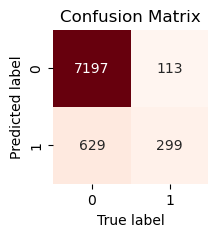

In [24]:
plt.figure(figsize=(2,2))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Reds', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.savefig('bank-data/bag_conf_mat.png')
plt.show()

In [90]:
# Evaluate the model performance
from sklearn import metrics

print("Accuracy: ", accuracy_score(y_test, y_pred))

print(metrics.classification_report(y_test, y_pred, digits=3))

Accuracy:  0.9107793153678078
              precision    recall  f1-score   support

          no      0.921     0.984     0.951      7310
         yes      0.726     0.334     0.458       928

    accuracy                          0.911      8238
   macro avg      0.823     0.659     0.704      8238
weighted avg      0.899     0.911     0.896      8238



## Boosting with Decision Stumps

In [109]:
ada_clf=AdaBoostClassifier(
DecisionTreeClassifier(max_depth=1),n_estimators=100,learning_rate=0.2)
start_time = time.time()
ada_clf.fit(X_train,y_train)
print(f'Training time: {(time.time()-start_time):.{2}f} seconds')
y_pred=ada_clf.predict(X_test)

Training time: 6.28 seconds


## Model Performance

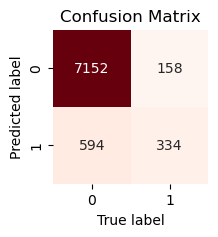

In [110]:
plt.figure(figsize=(2,2))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Reds', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.savefig('bank-data/boost_conf_mat.png')
plt.show()

In [111]:
# Evaluate the model performance
from sklearn import metrics

print("Accuracy: ", accuracy_score(y_test, y_pred))

print(metrics.classification_report(y_test, y_pred, digits=3))

Accuracy:  0.9087157076960427
              precision    recall  f1-score   support

          no      0.923     0.978     0.950      7310
         yes      0.679     0.360     0.470       928

    accuracy                          0.909      8238
   macro avg      0.801     0.669     0.710      8238
weighted avg      0.896     0.909     0.896      8238



## Comparision with Decision Tree Classifier and Naive Bayes

### Decision Tree Classifier


|        | precision   | recall | f1-score  | 
| -------  | ----------- |--------|-----------|
| no       |    0.939     |0.965    | 0.952 | 
| yes      | 0.646     |0.510     |0.570      |
|accuracy  |             |        |0.913     |






### Naive Bayes Classifier


|          | precision   | recall | f1-score | 
| -------  | ----------- |--------|----------|
| no       |     0.920    | 0.958  |   0.939 |
| yes      | 0.514     |0.348   |  0.415       |
|accuracy  |             |        |0.890      |

### Bagging Classifier

|        | precision   | recall | f1-score  | 
| -------  | ----------- |--------|-----------|
| no       |   0.921     |0.984     |0.951       |
| yes      | 0.726     |0.334     |0.458  |
|accuracy  |             |        |0.911      | 

### Boosting Classifier
|        | precision   | recall | f1-score  |
| -------  | ----------- |--------|---------|
| no       |    0.923    | 0.978   |  0.950  |   
| yes      | 0.679     |0.360     |0.470    |  
|accuracy  |             |        | 0.909 |

In [122]:
len(bank_data)

41188

## Movies Dataset

In [4]:
movies=pd.read_csv("movies/Data for repository.csv",index_col=0) #Movie Name col set as index since they are unique to each row
# Convert categorical variables into numerical using one-hot encoding


#Add target variable (hit or flop)
movies['y']=movies['Revenue(INR)']> movies['Budget(INR)']
movies['y']=movies['y'].map({True: 'hit', False: 'flop'})

movies=movies.drop(columns='Revenue(INR)')

# Convert categorical variables into numerical using one-hot encoding
movies = pd.get_dummies(movies, columns=['Release Period', 'Whether Remake', 
                                                 'Whether Franchise', 'Genre', 'New Actor', 'New Director',
                                                 'New Music Director', 'Lead Star', 'Director', 'Music Director'])
# Split the data into features and target
X = movies.drop(['y'], axis=1)
y = movies['y']


# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40,stratify=y)

## Decision Tree Classifier

In [21]:
param_grid = {'max_depth': [3, 4, 5, 6, 7, 8],
              'min_samples_split': [2, 3, 4, 5, 6],
              'min_samples_leaf': [1, 2, 3, 4, 5,6]}

movie_tree_clf = GridSearchCV(DecisionTreeClassifier(), param_grid)

start_time = time.time()
clf = movie_tree_clf.fit(X_train, y_train)

print(f'Training time: {(time.time()-start_time):.{2}f} seconds')



# Print the best parameters found by GridSearchCV
print("Best parameters found by GridSearchCV: ", movie_tree_clf.best_params_)

# Predict on the test set
y_pred = movie_tree_clf.predict(X_test)

Training time: 105.55 seconds
Best parameters found by GridSearchCV:  {'max_depth': 6, 'min_samples_leaf': 3, 'min_samples_split': 2}


### Model Performance

In [20]:
# Evaluate the model performance
from sklearn import metrics

print("Accuracy: ", accuracy_score(y_test, y_pred))

print(metrics.classification_report(y_test, y_pred, digits=3))

Accuracy:  0.9147058823529411
              precision    recall  f1-score   support

        flop      0.851     0.842     0.847        95
         hit      0.939     0.943     0.941       245

    accuracy                          0.915       340
   macro avg      0.895     0.892     0.894       340
weighted avg      0.914     0.915     0.915       340



## Bagging with Decision Trees

In [5]:
bag_clf=BaggingClassifier(DecisionTreeClassifier(),
                          n_estimators = 200, max_features = 0.5)

start_time = time.time()
bag_clf.fit(X_train,y_train)
print(f'Training time: {(time.time()-start_time):.{2}f} seconds')

y_pred=bag_clf.predict(X_test)


Training time: 11.75 seconds


### Model Performance

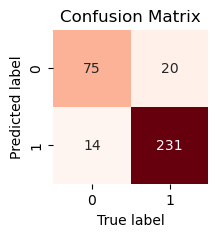

In [6]:
plt.figure(figsize=(2,2))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Reds', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.savefig('movies/bag_conf_mat.png')
plt.show()

In [7]:
# Evaluate the model performance
from sklearn import metrics

print("Accuracy: ", accuracy_score(y_test, y_pred))

print(metrics.classification_report(y_test, y_pred, digits=3))

Accuracy:  0.9
              precision    recall  f1-score   support

        flop      0.843     0.789     0.815        95
         hit      0.920     0.943     0.931       245

    accuracy                          0.900       340
   macro avg      0.882     0.866     0.873       340
weighted avg      0.899     0.900     0.899       340



### Boosting with Decision Stumps

In [10]:
ada_clf=AdaBoostClassifier(
DecisionTreeClassifier(max_depth=1),learning_rate=0.5)
start_time = time.time()
ada_clf.fit(X_train,y_train)
print(f'Training time: {(time.time()-start_time):.{2}f} seconds')
y_pred=ada_clf.predict(X_test)

Training time: 2.86 seconds


### Model Performance

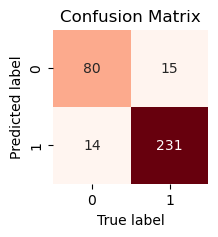

In [11]:
plt.figure(figsize=(2,2))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Reds', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.savefig('movies/boost_conf_mat.png')
plt.show()

In [12]:
# Evaluate the model performance
from sklearn import metrics

print("Accuracy: ", accuracy_score(y_test, y_pred))

print(metrics.classification_report(y_test, y_pred, digits=3))

Accuracy:  0.9147058823529411
              precision    recall  f1-score   support

        flop      0.851     0.842     0.847        95
         hit      0.939     0.943     0.941       245

    accuracy                          0.915       340
   macro avg      0.895     0.892     0.894       340
weighted avg      0.914     0.915     0.915       340



## Comparision with Decision Tree Classifier and Naive Bayes

### Decision Tree Classifier


|        | precision   | recall | f1-score  | 
| -------  | ----------- |--------|-----------|
| flop       |   0.851    | 0.842 |    0.847   | 
| hit      | 0.939   |  0.943|     0.941|
|accuracy  |             |        |0.915     |






### Naive Bayes Classifier

|        | precision   | recall | f1-score  | 
| -------  | ----------- |--------|-----------|
| flop       |0.671    | 0.579   |  0.621  | 
| hit      | 0.845   |  0.890  |   0.867  |
|accuracy  |             |        |0.803    |

### Bagging Classifier

|        | precision   | recall | f1-score  | 
| -------  | ----------- |--------|-----------|
| flop       | 0.843     | 0.789    | 0.815  | 
| hit      |  0.920    | 0.943  |   0.931   |    
|accuracy  |             |        |  0.900     |

### Boosting Classifier

|        | precision   | recall | f1-score  | 
| -------  | ----------- |--------|-----------|
| flop       |0.851   |  0.842   |  0.847  | 
| hit      | 0.939  |   0.943   |  0.941  |   
|accuracy  |             |        | 0.915    |